In [114]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt
import pandas as pd

In [282]:
cd ..

/home/ck


In [383]:
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/09/06/IR_wavelet_BT_20200906_*.nc'

In [384]:
data = xr.open_mfdataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [385]:
data

<xarray.Dataset>
Dimensions:  (lat: 339, lon: 400, time: 95)
Coordinates:
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079
  * time     (time) datetime64[ns] 2020-09-06 ... 2020-09-06T23:45:00
Data variables:
    power    (time, lat, lon) float64 dask.array<chunksize=(1, 339, 400), meta=np.ndarray>
    BT       (time, lat, lon) int16 dask.array<chunksize=(1, 339, 400), meta=np.ndarray>
Attributes:
    radii:              [ 1  2  2  3  5  7 10]
    scales_rounded:     [ 15  21  28  39  54  74 102]
    scales_original:    [ 15.          20.63312727  28.3817294   39.04025566 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [386]:
tstep_old = data.isel(time=0).load() #-12

In [387]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 339, lon: 400)
Coordinates:
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079
    time     datetime64[ns] 2020-09-06
Data variables:
    power    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BT       (lat, lon) int16 1882 1753 2006 1824 1956 ... 1516 1600 1811 1986
Attributes:
    radii:              [ 1  2  2  3  5  7 10]
    scales_rounded:     [ 15  21  28  39  54  74 102]
    scales_original:    [ 15.          20.63312727  28.3817294   39.04025566 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

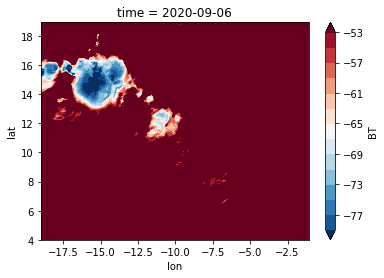

In [388]:
(tstep_old['BT']/100).plot.contourf(levels=np.arange(-79,-52,2))

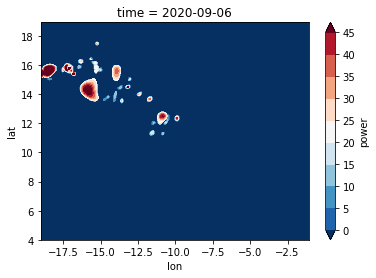

In [389]:
tstep_old['power'].plot.contourf(levels=np.arange(0,50,5))

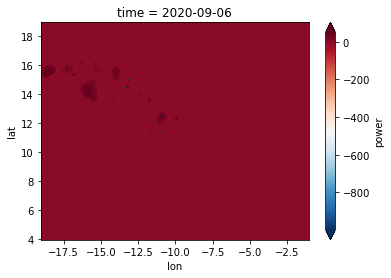

In [390]:
tstep_old['power'].plot.pcolormesh(vmin=-999, vmax=50, cmap='RdBu_r')

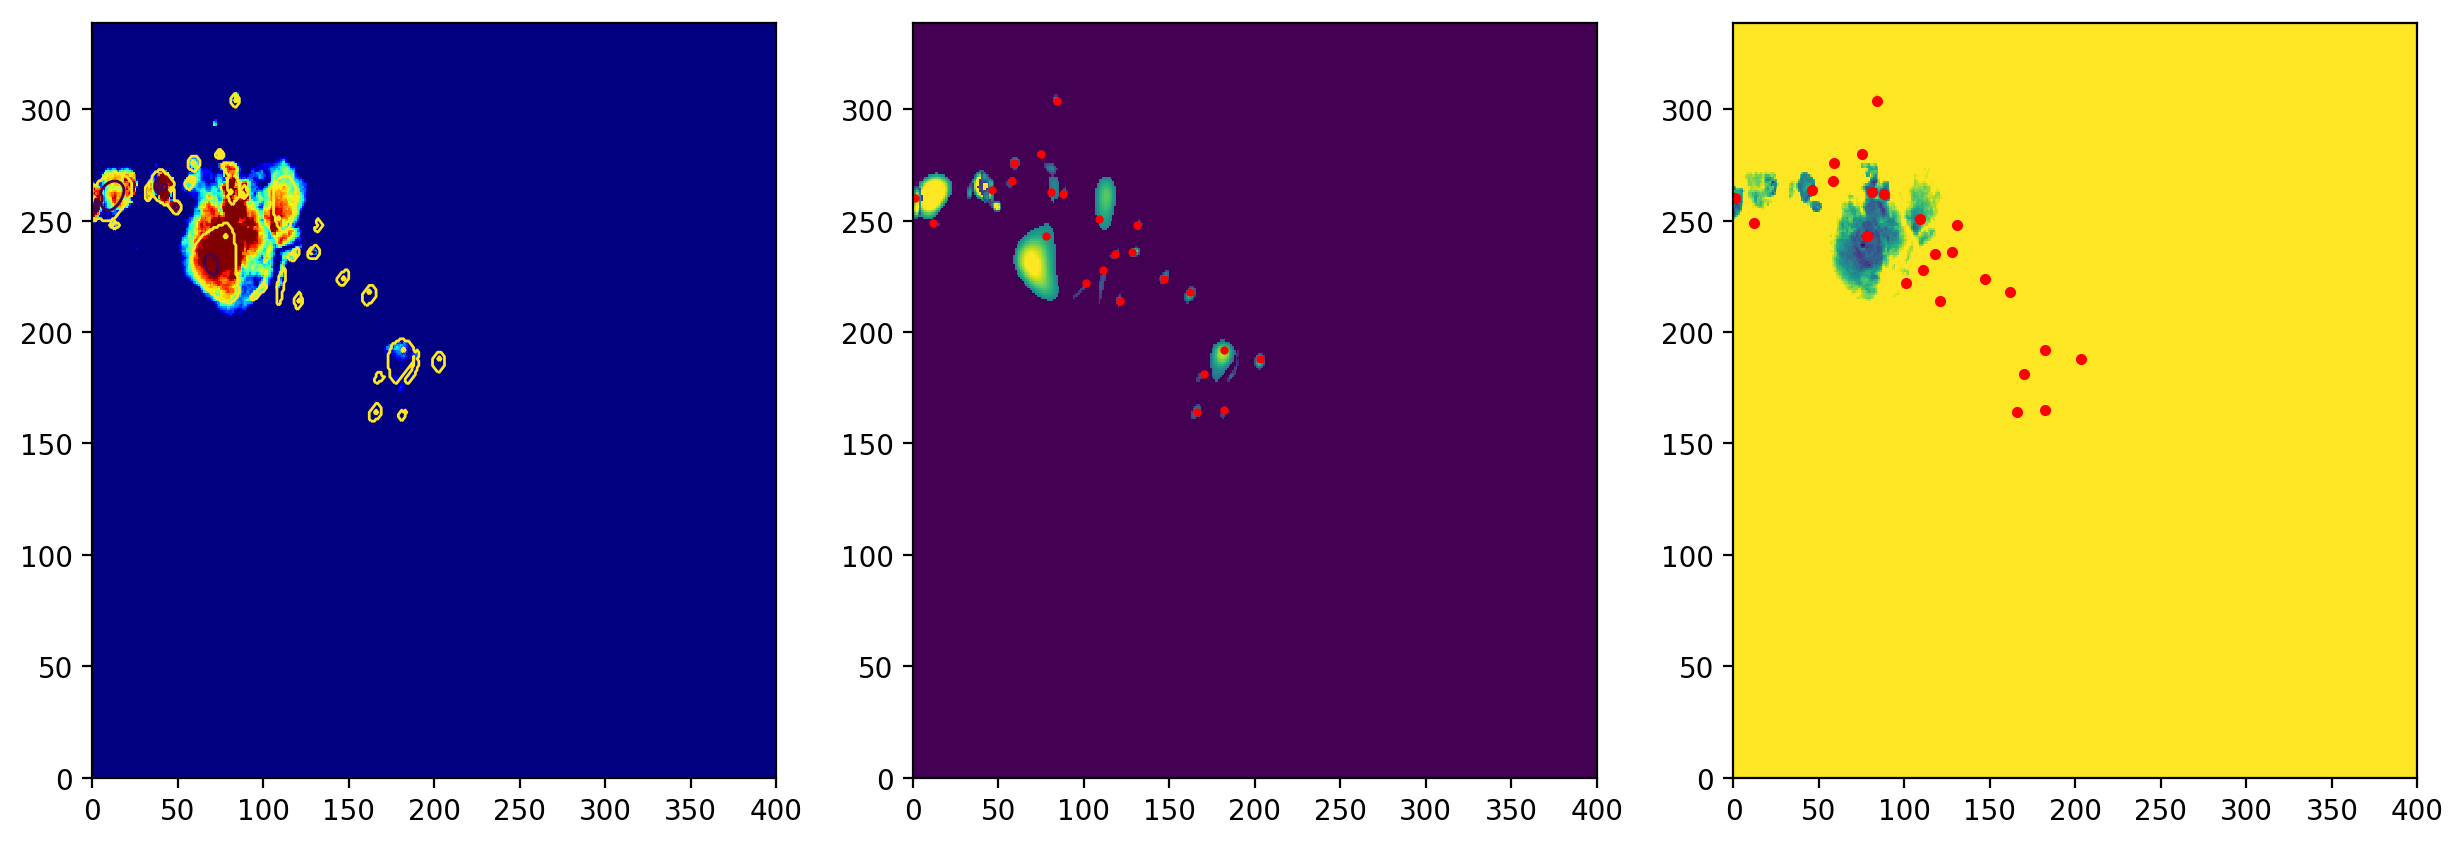

In [391]:
lon, lat = np.meshgrid(tstep_old['lon'], tstep_old['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(tstep_old['BT']/100, vmin=-80, vmax=-70, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[0,50], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(132)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(133)
plt.pcolormesh(tstep_old['BT']/100, vmax=-75, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    

#f.savefig('/home/ck/DIR/cornkle/data/test/old_cores'+tag+'.png')


In [392]:
meteosat_data = tstep_old['BT'].values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
outt, nogood, t_thresh_size, t_thresh_cut, pix_nb, area_img = utils.filter_img(meteosat_data, 3)

outmin -87.36 24.21


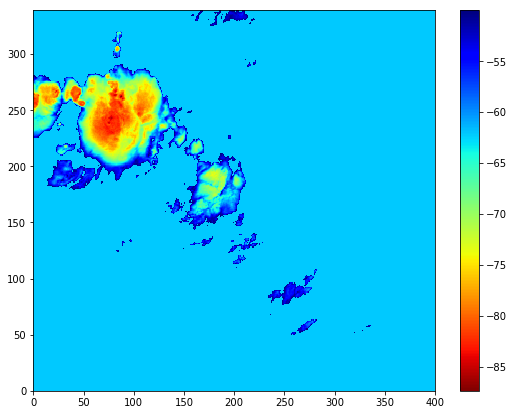

In [393]:
plt.figure(figsize=(9,7))
plt.pcolormesh(outt, cmap='jet_r')
plt.colorbar()

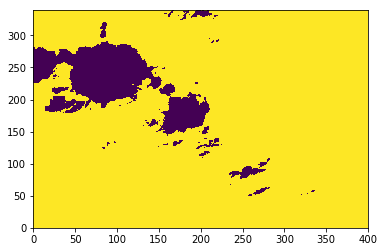

In [394]:
plt.pcolormesh(nogood)

In [395]:
wav = wavelet.waveletT(outt, dataset='METEOSAT3K_veraLS')

In [396]:
wav.keys()

dict_keys(['power', 'scales', 'res', 'coeffs'])

In [397]:
wav['scales']

array([ 12.        ,  16.16680292,  21.78045973,  29.34336666,
        39.53236883,  53.25933466,  71.75276393,  96.66773281,
       130.23401543])

In [398]:
wav['power'].shape

(9, 339, 400)

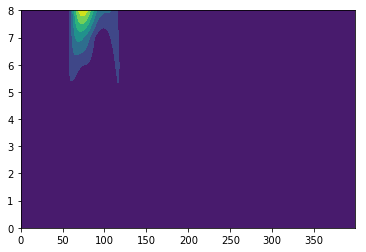

In [399]:
plt.contourf(wav['power'][:,240,:])

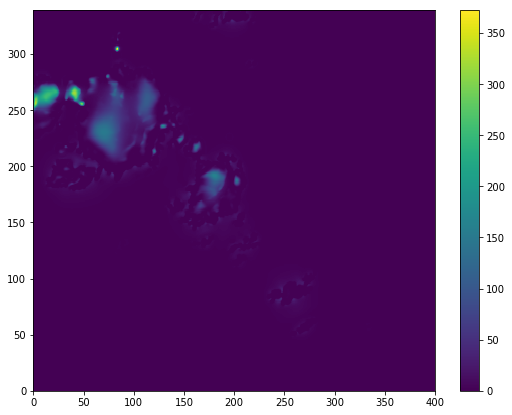

In [400]:
plt.figure(figsize=(9,7))
plt.pcolormesh(wav['power'].sum(axis=0))
plt.colorbar()

In [401]:
power_msg = utils.find_fixed_power(wav, nogood, area_img,3, dataset='MSG')

In [402]:
wav.keys()

dict_keys(['power', 'scales', 'res', 'coeffs'])

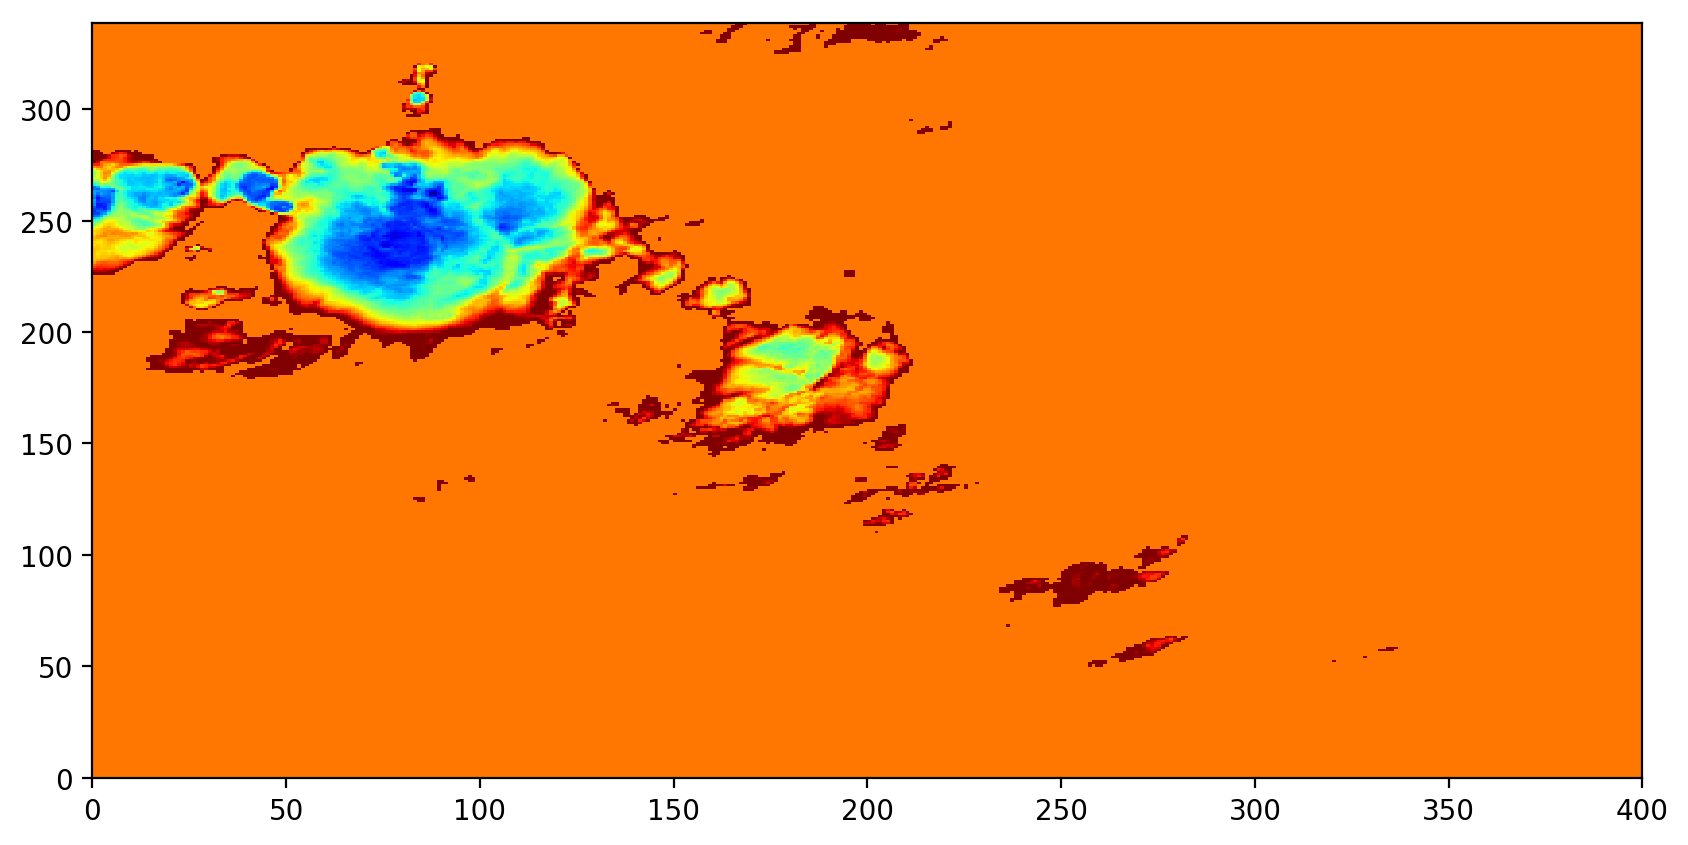

In [403]:
plt.figure(figsize=(10,5), dpi=200)
plt.pcolormesh(outt, vmax=-55, cmap='jet')

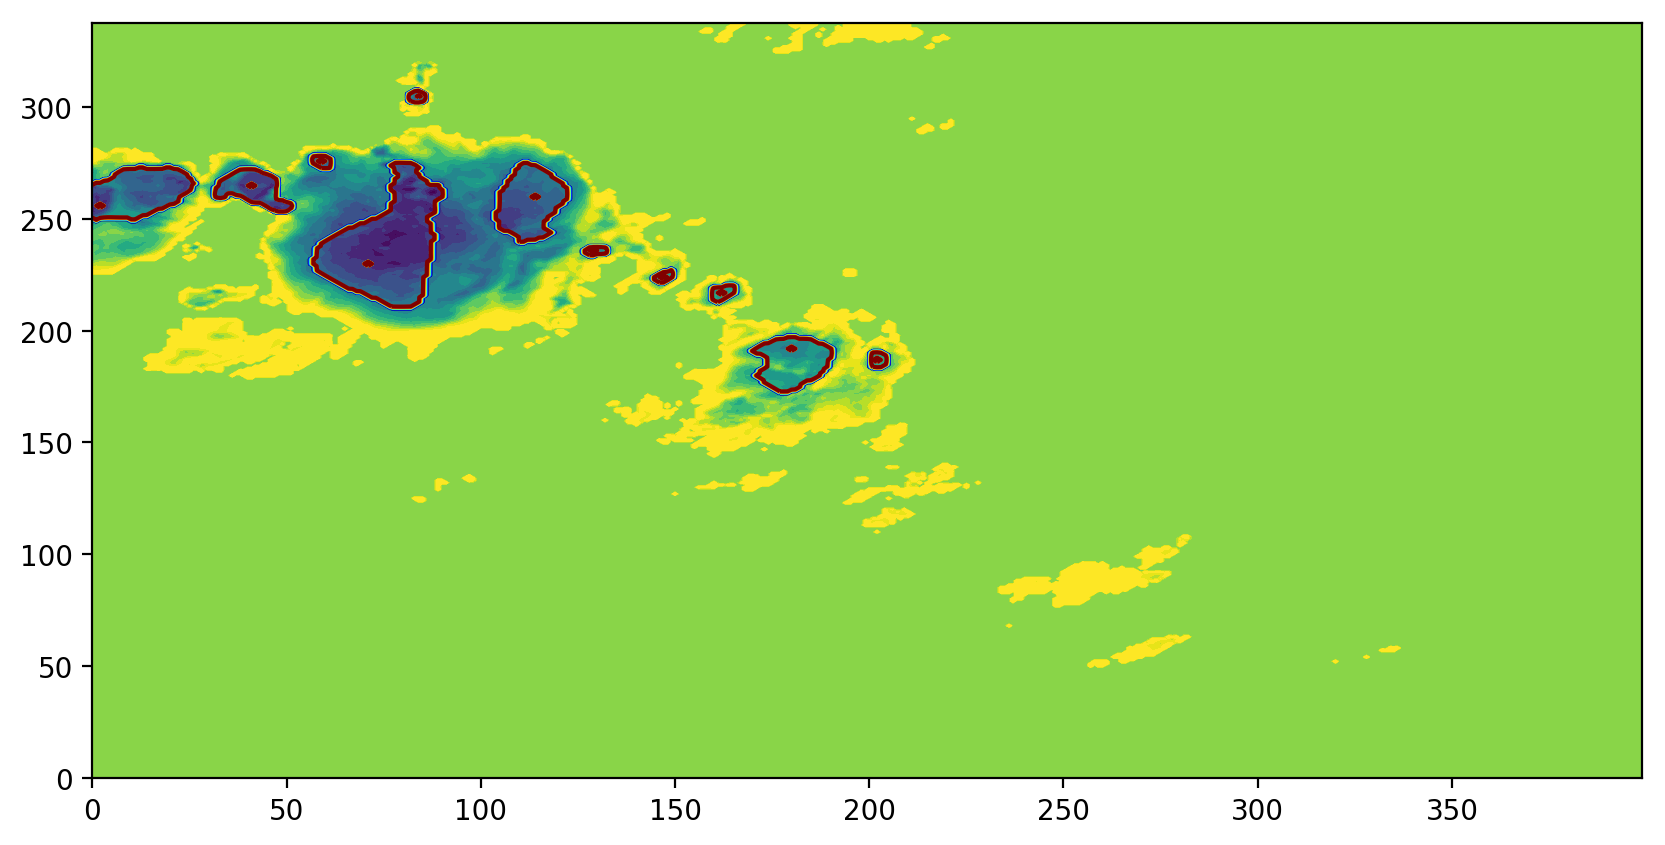

In [404]:
plt.figure(figsize=(10,5), dpi=200)
plt.contourf(outt, levels=np.arange(-85,-55,2), extend='both')
plt.contour(power_msg, cmap='jet', levels=[0,1,5,10,20,30,40,50])

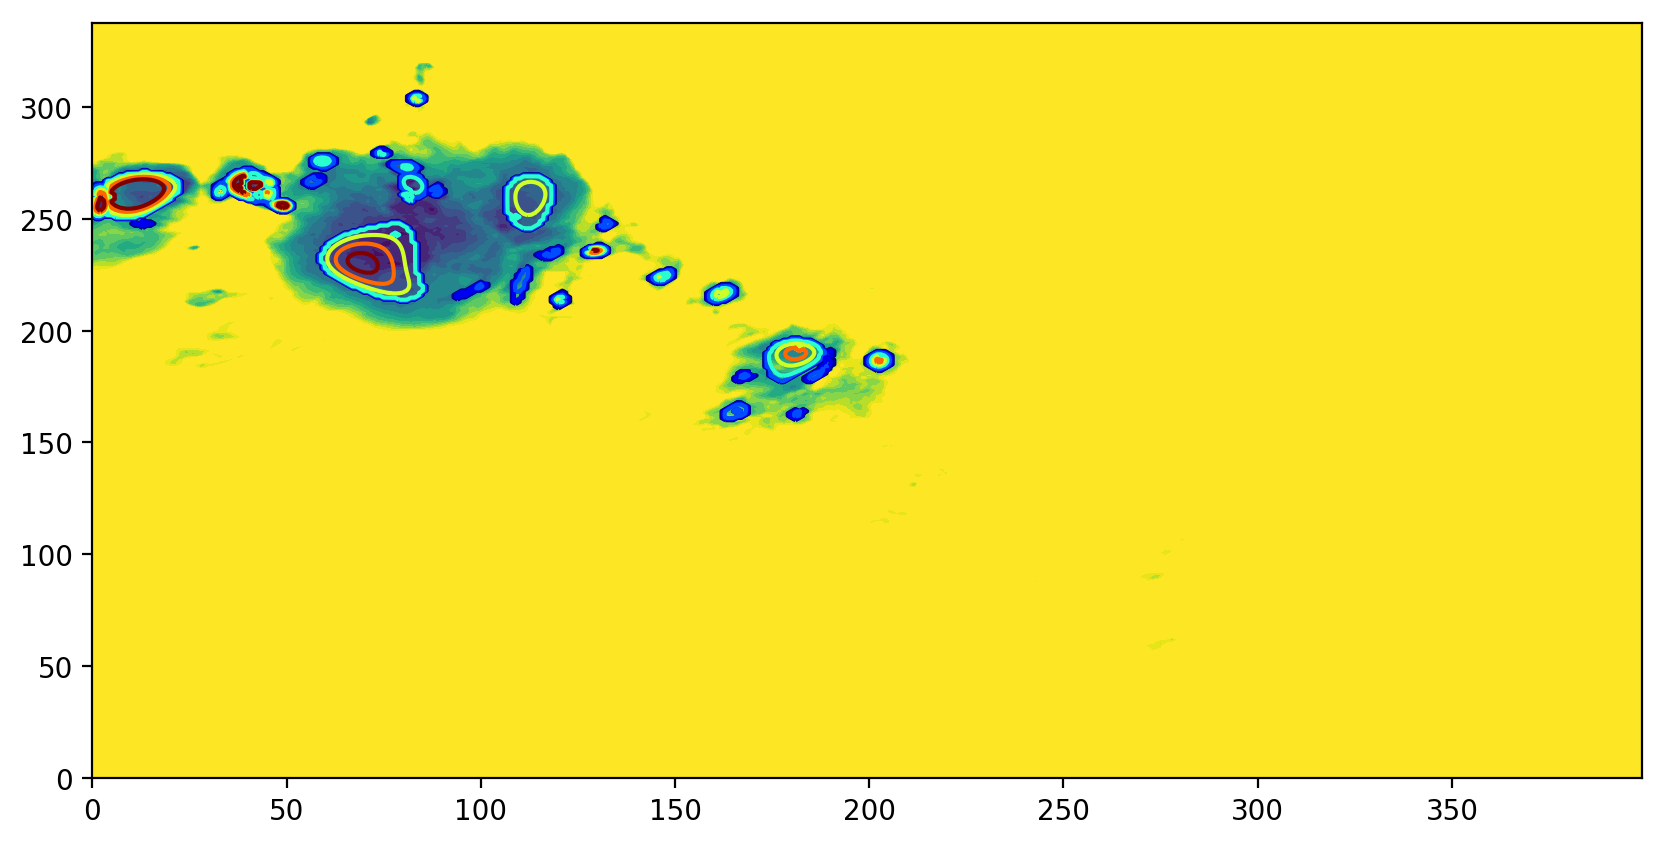

In [405]:
plt.figure(figsize=(10,5), dpi=200)
plt.contourf(tstep_old['BT'].values/100, levels=np.arange(-85,-55,2), extend='both')
plt.contour(tstep_old['power'].values, cmap='jet', levels=[0,1,5,10,20,30,40,50])

(array([   0., 5293., 2502., 1691., 1217.,  929.,  685.,  599.,  497.,
         398.,  353.,  319.,  266.,  226.,  204.,  182.,  169.,  165.,
         140.,  160.,  153.,  147.,  130.,  126.,   87.,   98.,  108.,
         108.,   94.,  111.,   93.,   98.,   90.,   81.,   78.,   74.,
          57.,   72.,   68.,   73.,   62.,   64.,   50.,   52.,   47.,
          55.,   54.,   44.,   55.,   45.,   47.,   45.,   40.,   56.,
          36.,   39.,   32.,   41.,   53.,   30.,   32.,   41.,   31.,
          47.,   41.,   34.,   38.,   44.,   48.,   37.,   43.,   38.,
          38.,   34.,   37.,   45.,   34.,   30.,   35.,   39.,   28.,
          39.,   39.,   37.,   47.,   28.,   26.,   34.,   33.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,

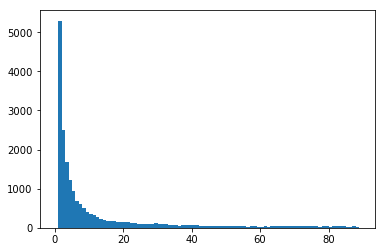

In [406]:
inputs = wav['power'].sum(axis=0)
inputs[inputs<=1] = np.nan
logn = inputs
plt.hist(logn[np.isfinite(logn)], bins=np.arange(0,90,1))

In [407]:
meteosat_data = tstep_old['BT'].copy().values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
savefile = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [408]:
date

<xarray.DataArray 'time' ()>
array('2020-09-06T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-09-06

In [409]:
date = [pd.datetime(date['time.year'], date['time.month'], date['time.day'], date['time.hour'], date['time.minute'])]

In [410]:
data = run_powerBlobs.wavelet_analysis(meteosat_data, longitudes, latitudes, date, savefile, data_resolution=5)

outmin -87.36 24.21
130.0
97.0
72.0
53.0
40.0
29.0
22.0
16.0
12.0
Saved /home/ck/DIR/cornkle/data/test/testblob.nc


In [411]:
data

<xarray.Dataset>
Dimensions:  (lat: 339, lon: 400, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-09-06
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079
Data variables:
    power    (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    BT       (time, lat, lon) int16 1882 1753 2005 1823 ... 1516 1600 1811 1986
Attributes:
    radii:              [ 1  1  2  2  3  5  7  9 13]
    scales_rounded:     [ 12  16  22  29  40  53  72  97 130]
    scales_original:    [ 12.          16.16680292  21.78045973  29.34336666 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [412]:
#newtest = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [413]:
#data = xr.open_dataset(newtest).load()#.sel(lat=slice(6,8), lon=slice(6,9.5))
tstep = data.squeeze()

In [414]:
tstep['BT']

<xarray.DataArray 'BT' (lat: 339, lon: 400)>
array([[1882, 1753, 2005, ..., 1330, 1455, 1390],
       [1757, 1804, 1963, ..., 1309, 1458, 1319],
       [1902, 1960, 2041, ..., 1264, 1445, 1474],
       ...,
       [ 281, -115,  553, ..., 2266, 2268, 2269],
       [-391, -329,  236, ..., 2074, 2117, 2130],
       [-670, -525, -433, ..., 1600, 1811, 1986]], dtype=int16)
Coordinates:
    time     datetime64[ns] 2020-09-06
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079

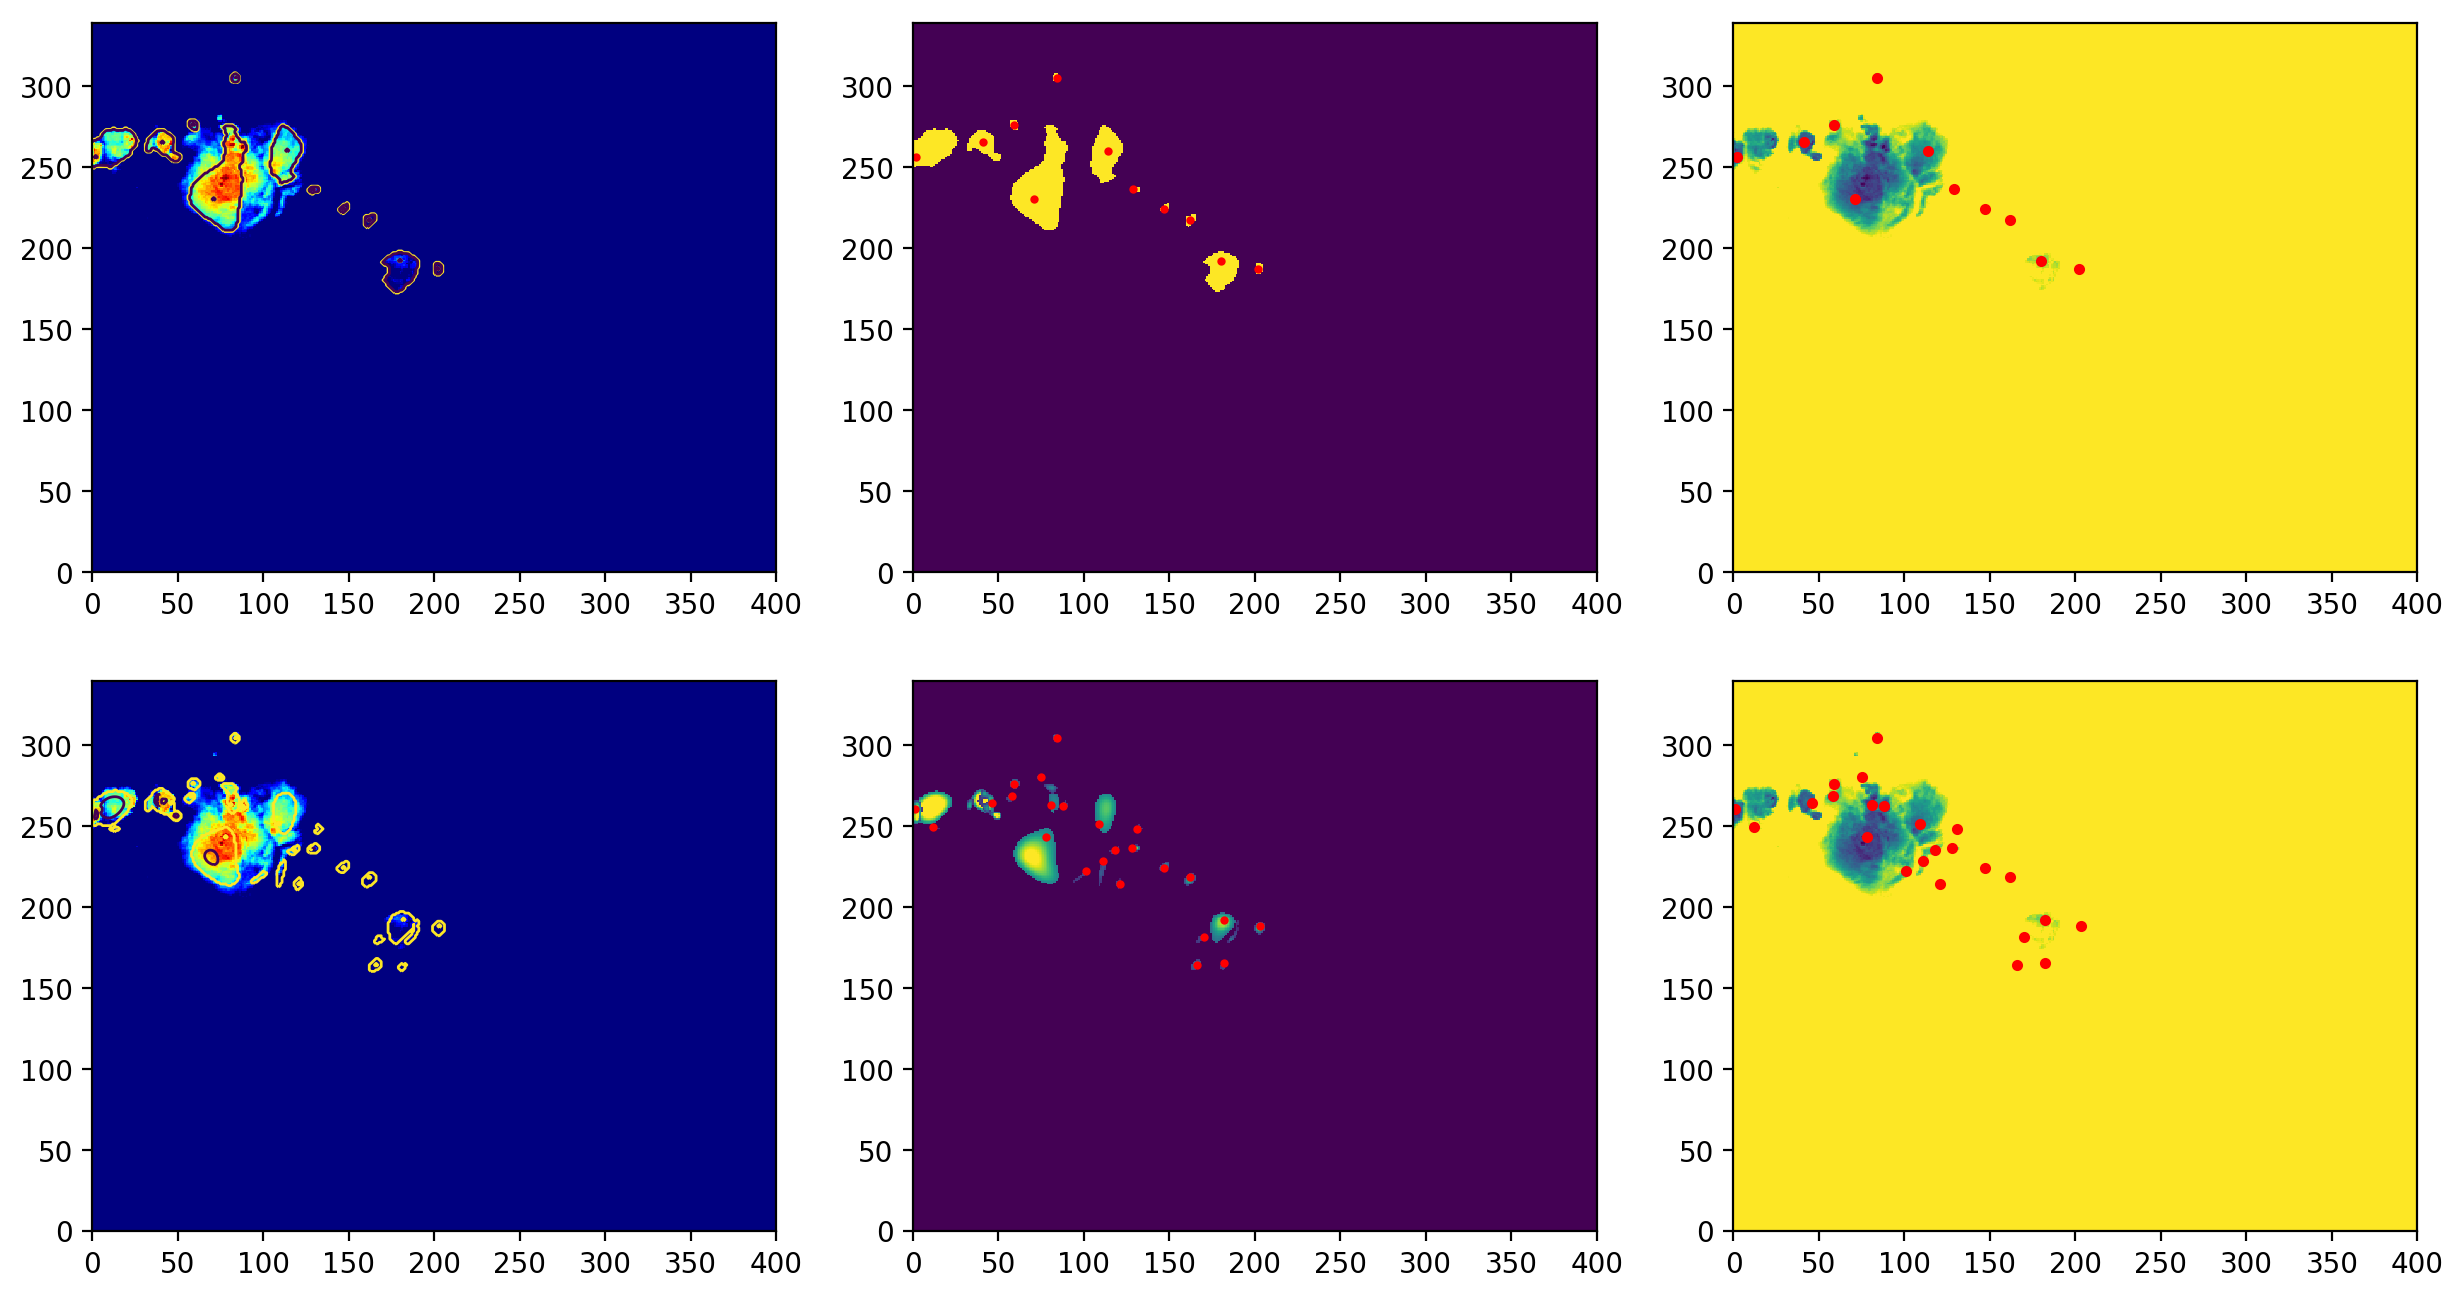

In [415]:
lon, lat = np.meshgrid(tstep['lon'], tstep['lat'])

f = plt.figure(figsize=(15,8), dpi=200)
f.add_subplot(231)
plt.pcolormesh(outt, vmin=-85, vmax=-70, cmap='jet_r')
plt.contour(power_msg, levels=[0,50], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(power_msg<-100)

f.add_subplot(232)
plt.pcolormesh(power_msg, vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(233)
plt.pcolormesh(outt, vmax=-70, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    
####################    

f.add_subplot(234)
plt.pcolormesh(tstep_old['BT']/100, vmin=-85, vmax=-70, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[0,50], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(235)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(236)
plt.pcolormesh(tstep_old['BT']/100, vmax=-70, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    
#f.savefig('/home/ck/DIR/cornkle/data/test/new_cores'+tag+'.png')

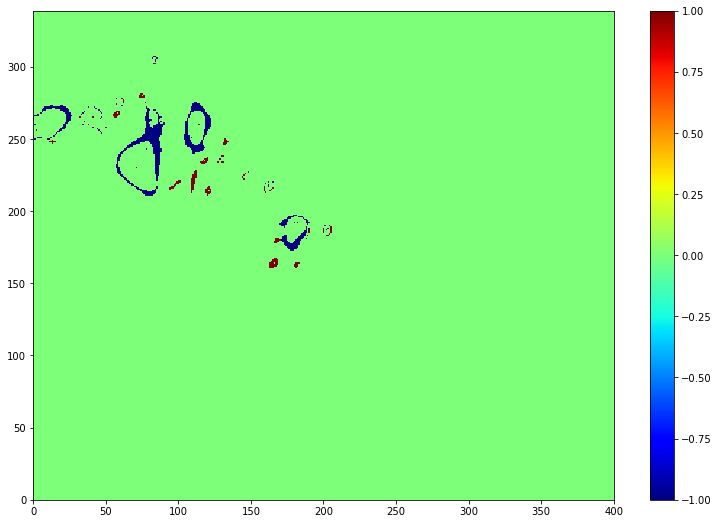

In [416]:
old_mask = np.array(tstep_old['power'].values > 0, dtype=int)
new_mask = np.array(power_msg > 0, dtype=int)
plt.figure(figsize=(13,9))
plt.pcolormesh(old_mask-new_mask, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()